In [81]:
import sys
sys.path.append("C:\\Users\\coco1\\PycharmProjects\\lhy-ml-course-hm")
import pandas as p
train_data = p.read_csv('./data/train.csv', header = 0, encoding='Big5')
test_data = p.read_csv('./data/test.csv', header=None, encoding='Big5')

In [82]:
def norm(x) :
    mean_x = np.mean(x, axis = 0) #18 * 9 
    std_x = np.std(x, axis = 0) #18 * 9 
    for i in range(len(x)): #12 * 471
        for j in range(len(x[0])): #18 * 9 
            if std_x[j] != 0:
                x[i][j] = (x[i][j] - mean_x[j]) / std_x[j]
    return x

In [ ]:
import plotly.graph_objects as go
print(train_data.columns)
date_distribute = train_data['日期']
i = 0
# for head in train_data.columns :
#     distribute = train_data[head]
#     fig = go.Figure(data=[go.Histogram(x=distribute)])
#     fig.update_layout()
#     i += 1
#     fig.show()

In [98]:
import numpy as np
# pre-processing and encoding
train_data[train_data =='NR'] = 0
train_data[train_data =='R'] = 1
train_data = train_data.iloc[:, 3:].to_numpy(dtype=float)

In [99]:
month_data = {}
for month in range(12):
    sample = np.empty([18, 480])
    for day in range(20):
        # train data 4320 * 
        sample[:, day * 24 : (day + 1) * 24] = \
            train_data[18 * (20 * month + day) : 18 * (20 * month + day + 1), :]
    month_data[month] = sample

In [100]:
x = np.empty([12 * 471, 18 * 9], dtype = float)
y = np.empty([12 * 471, 1], dtype = float)
for month in range(12):
    for day in range(20):
        for hour in range(24):
            if day == 19 and hour > 14:
                continue
            x[month * 471 + day * 24 + hour, :] = month_data[month][:,day * 24 + hour : day * 24 + hour + 9].reshape(1, -1) #vector dim:18*9 (9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9)
            y[month * 471 + day * 24 + hour, 0] = month_data[month][9, day * 24 + hour + 9] #value
print(x)
print(y)

[[14.  14.  14.  ...  2.   2.   0.5]
 [14.  14.  13.  ...  2.   0.5  0.3]
 [14.  13.  12.  ...  0.5  0.3  0.8]
 ...
 [17.  18.  19.  ...  1.1  1.4  1.3]
 [18.  19.  18.  ...  1.4  1.3  1.6]
 [19.  18.  17.  ...  1.3  1.6  1.8]]
[[30.]
 [41.]
 [44.]
 ...
 [17.]
 [24.]
 [29.]]


In [101]:
mean_x = np.mean(x, axis = 0) #18 * 9 
std_x = np.std(x, axis = 0) #18 * 9 
for i in range(len(x)): #12 * 471
    for j in range(len(x[0])): #18 * 9 
        if std_x[j] != 0:
            x[i][j] = (x[i][j] - mean_x[j]) / std_x[j]
x

array([[-1.35825331, -1.35883937, -1.359222  , ...,  0.26650729,
         0.2656797 , -1.14082131],
       [-1.35825331, -1.35883937, -1.51819928, ...,  0.26650729,
        -1.13963133, -1.32832904],
       [-1.35825331, -1.51789368, -1.67717656, ..., -1.13923451,
        -1.32700613, -0.85955971],
       ...,
       [-0.88092053, -0.72262212, -0.56433559, ..., -0.57693779,
        -0.29644471, -0.39079039],
       [-0.7218096 , -0.56356781, -0.72331287, ..., -0.29578943,
        -0.39013211, -0.1095288 ],
       [-0.56269867, -0.72262212, -0.88229015, ..., -0.38950555,
        -0.10906991,  0.07797893]])

In [ ]:
train_data_p1 = train_data.reshape()
zeros = np.zeros(train_data.shape)
print(zeros.shape)
ind = 0
for d in train_data :
    zeros[:,ind] = norm(d)
    ind += 1
sample_train_data = np.array([zeros[str(i)].to_numpy(dtype=float , copy = True).reshape(-1, 18) for i in range(24)])

In [102]:
import math
x_train_set = x[: math.floor(len(x) * 0.8), :]
y_train_set = y[: math.floor(len(y) * 0.8), :]
x_validation = x[math.floor(len(x) * 0.8): , :]
y_validation = y[math.floor(len(y) * 0.8): , :]

In [103]:
# sample_train_data[0] # organized by date in hours, each hours rep a training batch

In [ ]:
# test_data[test_data =='NR'] = 0
# test_data[test_data =='R'] = 1
# sample_test_data = np.array([np.insert(test_data[i].to_numpy(dtype=float).reshape((-1, 18)), obj = 0,values=float(i), axis=1) for i in range(2, 11)]).reshape((-1,19))
# 

In [68]:
# # train_label = sample_train_data[:,10].reshape(-1, 24)
# # test_label = sample_test_data[:, 10].reshape(-1, 24)
# # train_data_in =  np.hstack((sample_train_data[:, :10], sample_train_data[:, 11:])).reshape((-1,24,18))
# # test_data_in = np.hstack((sample_test_data[:, :10], sample_test_data[:, 11:])).reshape((-1, 24,18))
# # 

In [16]:
# # # linear regression approach
# # linear_regression_parameter = np.random.randn((18))
# # 
# # print(linear_regression_parameter)
# # linear_regression_bias = np.random.randn((1))
# # lr = 0.0001
# # opt_loss = 0.1
# # def loss (in_data, label) :
# #     return label - (in_data.dot(linear_regression_parameter) + linear_regression_bias)
# # def gd(loss, in_data) :
# #     return [-2 * loss, -2 * (loss) * in_data]
# # i = 0
# # 
# # for datas in train_data_in :
# #     for data in datas :
# #         _loss = loss(data, train_label[i])
# #         print(_loss)
# #         g = gd(_loss, data)
# #         linear_regression_parameter -= g[1] * lr
# #         linear_regression_bias -= g[0] * lr
# #         i += 1

[ 0.32437355 -0.16292008  0.38468061  0.11418097  0.23890554 -0.45578733
  1.13403962 -0.5394077   0.24992484 -0.45451071  0.36094464 -0.40712788
 -1.79727606  0.21107668 -0.40115591 -1.28958939 -0.24669809  0.0619653 ]
[134.99818881]
[-201.15205083]
[1127.10305501]
[-3155.70205004]
[4757.07225616]
[-17586.3124221]
[93288.31100246]
[-535588.28489294]
[1977863.19202562]
[-3809050.60568708]
[11211712.16363422]
[-91553002.9739823]
[1.32770606e+09]
[-8.1510896e+09]
[1.79631564e+10]
[-5.75728076e+10]
[2.6208219e+11]
[-1.93332651e+12]
[1.18644239e+13]
[-4.7378195e+13]
[2.76997096e+14]
[-1.17849191e+15]
[4.66726365e+15]
[-1.63984491e+16]
[6.74740451e+16]
[-1.12293005e+18]
[1.28988518e+19]
[-3.88935803e+20]
[1.85463611e+22]
[-2.28489989e+23]
[6.5848895e+23]
[-1.31038343e+24]
[3.53157583e+24]
[-1.36075039e+25]
[4.07027614e+25]
[-1.52299358e+26]
[8.77174175e+26]
[-5.93224823e+27]
[2.39030805e+28]
[-9.95763752e+28]
[8.64127035e+29]
[-1.11115967e+31]
[9.46478896e+31]
[-3.66903928e+32]
[8.90625684e

c:\users\coco1\pycharmprojects\lhy-ml-course-hm\venv\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning:

overflow encountered in multiply

c:\users\coco1\pycharmprojects\lhy-ml-course-hm\venv\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning:

invalid value encountered in subtract



In [111]:
import torch as th
import torch.nn.functional as F
class PMRegressionLayer(th.nn.Module) :
    def __init__(self, input_d, output):
        super(PMRegressionLayer, self).__init__()
        self.layer = th.nn.Linear(input_d, output)
        # th.nn.init.kaiming_normal_(self.layer.parameters())
        # self.active_function = act

    def forward(self, indata) :
        h = self.layer(indata)
        
        return h
    
class PMRegressionModel(th.nn.Module) :
    def __init__(self, input_d, hidden_size, layer_num, act = th.tanh):
        super(PMRegressionModel, self).__init__()
        self.active_function = act
        self.model = th.nn.Sequential()
        out = hidden_size
        inp = input_d
        for i in range(layer_num) :
            self.model.add_module('reg%i' % i, PMRegressionLayer(inp, out))
            inp = out
        self.model.add_module('sum', th.nn.Linear(out, 1))
    
    def forward(self, indata):
        input = indata
        for mod in self.model :
            input = mod(input)
            # input = self.active_function(input)
        return input

In [167]:
def loss_f(y_, y) :
    return th.sqrt(th.sum(th.pow(y_ - y, 2))/471/12)

In [174]:
model = th.nn.Sequential(
    th.nn.Linear(18 * 9, 18 * 9),
    th.nn.Linear(18 * 9, 1)
    )
print(model)
opt = th.optim.Adam(model.parameters(), lr = 1)
criterion = F.mse_loss
epochs = 2000
lindex = 0
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    input = th.tensor(x_train_set, dtype=th.float)
    label = th.tensor(y_train_set, dtype=th.float)
    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    opt.zero_grad()
    # get output from the model, given the inputs
    outputs = model(input)
    # get loss for the predicted output
    loss = loss_f(outputs, label)
    # get gradients w.r.t to parameters
    loss.backward()
    lindex += 1
    # update parameters
    opt.step()
    if lindex % 50 == 0 :
        print('epoch {}, loss {}'.format(epoch, loss.item()))

Sequential(
  (0): Linear(in_features=162, out_features=162, bias=True)
  (1): Linear(in_features=162, out_features=1, bias=True)
)
epoch 49, loss 25.982500076293945
epoch 99, loss 10.588057518005371
epoch 149, loss 5.491135120391846
epoch 199, loss 5.205802917480469
epoch 249, loss 5.141271114349365
epoch 299, loss 5.123404502868652
epoch 349, loss 5.125075340270996
epoch 399, loss 5.258205890655518
epoch 449, loss 5.270402431488037
epoch 499, loss 5.14828634262085
epoch 549, loss 5.160642623901367
epoch 599, loss 5.449702739715576
epoch 649, loss 5.655215740203857
epoch 699, loss 5.763035774230957
epoch 749, loss 5.856816291809082
epoch 799, loss 5.9064555168151855
epoch 849, loss 5.776957988739014
epoch 899, loss 5.791107177734375
epoch 949, loss 5.431439399719238
epoch 999, loss 5.4940667152404785
epoch 1049, loss 5.5096354484558105
epoch 1099, loss 5.437428951263428
epoch 1149, loss 5.403509616851807
epoch 1199, loss 5.380045413970947
epoch 1249, loss 5.363877296447754
epoch 1299,

In [128]:
print(y_validation[10]) 
print(model(th.tensor(x_validation[10], dtype=th.float)))
float(model(th.tensor(x_validation[10], dtype=th.float))[0])

[34.]
tensor([34.2207], grad_fn=<AddBackward0>)


34

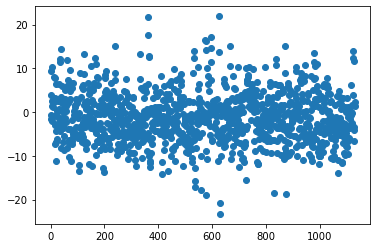

In [173]:
import matplotlib.pyplot as plt
plt.scatter(x = [int(i)  for i in range(y_validation.shape[0])] ,
            y = [float(y_validation[i]) - float(model(th.tensor(x_validation[i], dtype=th.float))) for i in range(y_validation.shape[0])]
            )
plt.show()

In [142]:
dim = 18 * 9 + 1
w = np.zeros([dim, 1])
# x = np.concatenate((np.ones([12 * 471, 1]), x), axis = 1).astype(float)
learning_rate = 100
iter_time = 1000
adagrad = np.zeros([dim, 1])
eps = 0.0000000001
for t in range(iter_time):
    loss = np.sqrt(np.sum(np.power(np.dot(x, w) - y, 2))/471/12)#rmse
    if(t%100==0):
        print(str(t) + ":" + str(loss))
    gradient = 2 * np.dot(x.transpose(), np.dot(x, w) - y) #dim*1
    adagrad += gradient ** 2
    w = w - learning_rate * gradient / np.sqrt(adagrad + eps)
np.save('weight.npy', w)
w

0:27.071214829194115
100:33.789058597774535
200:19.91375129819709
300:13.531068193689691
400:10.64546615844617
500:9.277353455475065
600:8.5180420459565
700:8.014061987588422
800:7.63675682477569
900:7.3365637403711235


array([[ 2.13740269e+01],
       [ 3.58888909e+00],
       [ 4.56386323e+00],
       [ 2.16307023e+00],
       [-6.58545223e+00],
       [-3.38885580e+01],
       [ 3.22235518e+01],
       [ 3.49340354e+00],
       [-4.60308671e+00],
       [-1.02374754e+00],
       [-3.96791501e-01],
       [-1.06908800e-01],
       [ 2.22488184e-01],
       [ 8.99634117e-02],
       [ 1.31243105e-01],
       [ 2.15894989e-02],
       [-1.52867263e-01],
       [ 4.54087776e-02],
       [ 5.20999235e-01],
       [ 1.60824213e-01],
       [-3.17709451e-02],
       [ 1.28529025e-02],
       [-1.76839437e-01],
       [ 1.71241371e-01],
       [-1.31190032e-01],
       [-3.51614451e-02],
       [ 1.00826192e-01],
       [ 3.45018257e-01],
       [ 4.00130315e-02],
       [ 2.54331382e-02],
       [-5.04425219e-01],
       [ 3.71483018e-01],
       [ 8.46357671e-01],
       [-8.11920428e-01],
       [-8.00217575e-02],
       [ 1.52737711e-01],
       [ 2.64915130e-01],
       [-5.19860416e-02],
       [-2.5

In [172]:
for param in model.parameters():
    print((param.data.data[:]), param.size())


tensor([[ 2.1646e-01, -4.9735e-01,  8.6965e-01, -1.8398e+00, -2.9378e-01,
          7.1370e-01, -8.4492e-01, -1.4581e+00,  2.5333e+00, -2.5205e-01,
          1.9758e-01,  1.5027e-02,  4.8611e-03,  1.4727e-02, -4.2413e-02,
         -1.0696e-02,  2.3922e-01,  3.7525e-01,  8.1654e-02, -2.6120e-02,
          7.7605e-02, -1.3740e-01,  1.6139e-01, -2.6358e-02, -1.5720e-01,
          9.9793e-02,  3.8885e-01, -2.1372e-01,  3.7432e-01, -3.7011e-01,
          2.9241e-01,  3.5787e-01, -4.9467e-01,  2.7070e-01,  1.7258e-01,
          4.8758e-02,  2.1822e-01,  3.5486e-01,  3.0064e-01, -1.1404e+00,
         -2.0714e-01, -3.3741e-01, -4.4221e-02, -7.5613e-01, -5.1494e-01,
         -3.0873e-02,  4.1151e-01,  3.7476e-02, -2.6083e+00, -1.0236e+00,
         -3.6160e-01, -8.1464e-01, -3.2705e+00,  2.1813e-01,  1.5546e-01,
         -1.0583e+00, -2.3819e-02,  3.1318e+00,  1.0467e+00,  7.2432e-01,
          4.8932e-01,  3.4830e+00,  1.7731e+00, -8.3887e-02,  3.7474e-01,
         -3.0452e-01, -2.6276e-01, -7.